In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars

%matplotlib inline

1. import the necessary packages

2. Use heart disease data set to build a BAD graph (`"https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart.csv"`).
    * have fun with it! What could you make worse? Add visual clutter? Reduce Contrast? Make it inaccessible? Make the message difficult to understand?
    * Talk in your Breakout groups about WHY these things make the graph bad.

3. Use heart disease data set to answer the question of whether people with heart disease (people with heart disease have a value of `1` for the variable `target`) have higher cholesterol than people without heart disease. Create your graph one step at a time, starting with a default `ggplot() + geom_XXX()` type of graph and build from there, adding markdown cells to explain your reasoning for making changes. Think about the principles we talked about:

    * which elements do NOT support your message? Take them out (you can google ggplot/plotnine syntax to figure out how to remove or change things like text, grids, axes, legends...etc)
    * which elements DO support your message? How can you make these more noticeable/salient?
    * Who is your audience? How can you make your graph more inclusive and accessible?
    
4. Use the KC house data (`"https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/kc_house_data.csv"`) to build a clear graph that answers the question "Is the relationship between price and square footage the same for houses with different numbers of floors?". Create your graph one step at a time, starting with a default `ggplot() + geom_XXX()` type of graph and build from there, adding markdown cells to explain your reasoning for making changes. Again, think about the principles we talked about:

    * which elements do NOT support your message? Take them out (you can google ggplot/plotnine syntax to figure out how to remove or change things like text, grids, axes, legends...etc)
    * which elements DO support your message? How can you make these more noticeable/salient?
    * Who is your audience? How can you make your graph more inclusive and accessible?
    
5. Come up with **one specific question** with your group that you want to *always* ask yourselves when making a graph to make sure it's accessible to a certain group. Draw on your own experiences (and your friends/family's experiences). For example, if you have a rare type of colorblindness, you might come up with the question "Is my palette readable by someone with tritanomaly colorblindness?". Think about visual impairments, cultural/group contex that not everyone shares, language barriers...etc. We'll share these with the class.

In [ ]:
#2
heart = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart.csv")
(ggplot(heart, aes(x = "age", y = "chol")) + geom_point() +
stat_smooth(method="lm") +
labs(x = "", y = ""))

In [ ]:
heart.head()

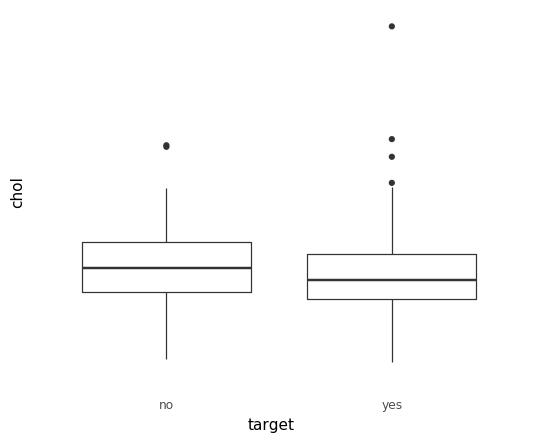

<ggplot: (8793503608137)>

In [33]:
#3
#rename target to yes heart disease, no heart disease
heart["target"] = heart["target"].replace([1], 'yes')
heart["target"] = heart["target"].replace([0], 'no')

heart.head()

(ggplot(heart, aes(x = "target", y = "chol")) + 
geom_boxplot() +
theme_minimal() +
theme(panel_grid_major_x = element_blank(),
    panel_grid_major_y = element_blank(),
    panel_grid_minor_y = element_blank(),
    axis_text_y = element_blank(),
    legend_position = "none")
)

In [36]:
house = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/kc_house_data.csv")
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


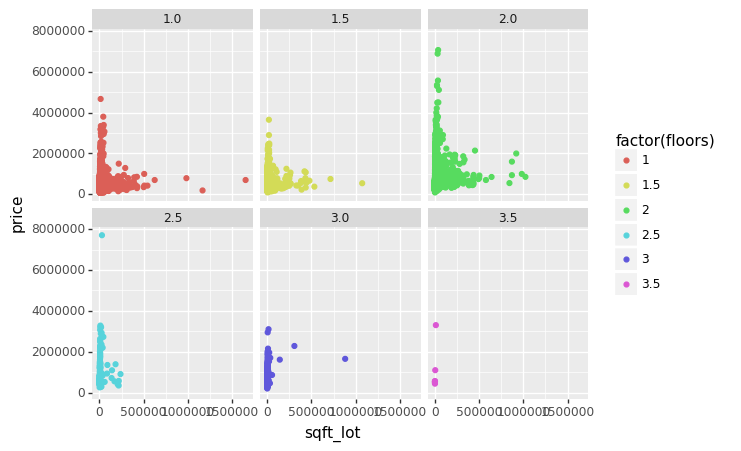

<ggplot: (8793503657993)>

In [38]:
(ggplot(house, aes ( x = "sqft_lot", y = "price", color = "factor(floors)")) + geom_point() + facet_wrap("~floors"))